In [2]:
#pip install nltk

In [3]:
#pip install spacy


import libraries

In [4]:
#import libraries
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to C:\Users\Josiah
[nltk_data]     Lee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Josiah
[nltk_data]     Lee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.DataFrame(pd.read_csv('../Twitter Sentiment/cleanedNspelt.csv'))

def helper(string):
    temp = []
    for word in string[1:-1].split(','):
        word = word.strip()
        word = word[1:-1]
        if word:
          temp.append(word)  
    return temp
data.filtered_tokens = data.filtered_tokens.apply(helper)

Use if machine is not very strong

In [6]:
#data = data.iloc[25000:75000]
#data.shape

In [7]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(data.filtered_tokens, data.labels, stratify = data.labels, test_size=0.2, random_state=42)

In [8]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')
sentences = [' '.join(words) for words in X_train]

# Fit and transform the sentences
one_hot_encoded = vectorizer.fit_transform(sentences)

In [9]:
test = SelectKBest(score_func=chi2, k=1000)
X_train_new = test.fit_transform(one_hot_encoded, y_train)

In [10]:
clf = BernoulliNB()
clf.fit(X_train_new, y_train)

BernoulliNB()

In [11]:
sen = [' '.join(words) for words in X_test]
X_test_new = vectorizer.transform(sen)
X_test_new = test.transform(X_test_new)
y_pred = clf.predict(X_test_new)

In [12]:
sent = "i am sad"
sent = vectorizer.transform([sent])
sent = test.transform(sent)
print(clf.predict_proba(sent))

[[0.89728933 0.10271067]]


In [13]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.74215
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     10000
           1       0.72      0.78      0.75     10000

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000



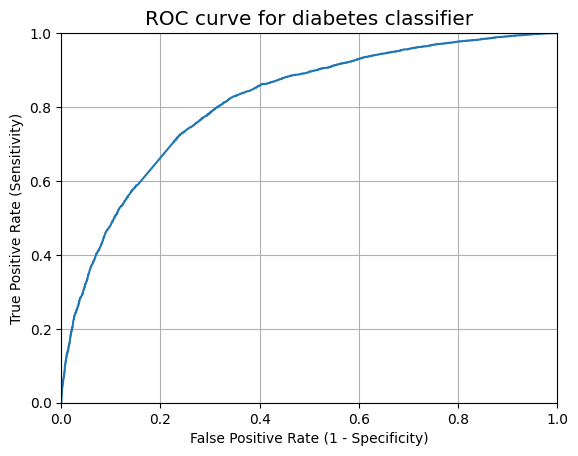

In [15]:
from sklearn.metrics import roc_curve

y_pred_prob = clf.predict_proba(X_test_new)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [17]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

0.8128205199999999


In [18]:
cv_results = cross_validate(clf, X_train_new, y_train, cv = 5, n_jobs=-1)

In [20]:
cv_results['test_score'].mean()

0.750525